<div class="alert alert-block alert-info"><b><h1>Decision Tree Classification</h1></b></div>

<div class="alert alert-block alert-info"><em>Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<div class="alert alert-block alert-info"><em>Importing the datasets

<div class="alert alert-block alert-warning"><em>Test Dataset

In [3]:
df_test = pd.read_csv("Airline_Passenger_Satisfaction_Test_Cleaned.csv")
df_test.head()

,id,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
4,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied


<div class="alert alert-block alert-warning"><em>Train Dataset

In [4]:
df_train = pd.read_csv("Airline_Passenger_Satisfaction_Train_Cleaned.csv")
df_train.head()

,id,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


<div class="alert alert-block alert-info"><b><h3>Data Preparation for the Decision Tree Classification Using a Test and Train Set</h3></b></div>

In [5]:
df_train = pd.read_csv("Airline_Passenger_Satisfaction_Train_Cleaned.csv")
df_test = pd.read_csv("Airline_Passenger_Satisfaction_Test_Cleaned.csv")

def conv_cat(data):
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    data['CustomerType'] = data['CustomerType'].map({'Loyal Customer': 1, 'disloyal Customer': 0})
    data['TypeOfTravel'] = data['TypeOfTravel'].map({'Personal Travel':0, 'Business travel':1})
    data['Class'] = data['Class'].map({'Business':2, 'Eco Plus':1, 'Eco':0})
    data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
    data = pd.get_dummies(data)
    data.drop('id',axis=1,inplace=True)
    data.fillna(0,inplace=True)
    return data
df_train = conv_cat(df_train)
df_test = conv_cat(df_test)

<div class="alert alert-block alert-warning"><em>Test Dataset

In [6]:
df_test.head()

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,GateLocation,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
4,0,1,16,1,0,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,1


<div class="alert alert-block alert-warning"><em>Train Dataset

In [7]:
df_train.head()

,Gender,CustomerType,Age,TypeOfTravel,Class,FlightDistance,InflightWifiservice,DepartureArrivalTimeCconvenient,EaseOfOnlineBooking,GateLocation,...,InflightEntertainment,OnBoardService,LegRoomService,BaggageHandling,CheckinService,InflightService,Cleanliness,DepartureDelayInMinutes,ArrivalDelayInMinutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


<div class="alert alert-block alert-info"><b><h3>Decision Tree Classification</h3></b></div>

In [8]:
# X = df_train.loc[:, df_train.columns != 'satisfaction']
# y = df_train.loc[:, df_train.columns == 'satisfaction']

X = df_train.loc[:, ["CustomerType", "TypeOfTravel", "Class", "FlightDistance", "InflightWifiservice", "EaseOfOnlineBooking", "FoodAndDrink", "OnlineBoarding", "SeatComfort", "InflightEntertainment", "OnBoardService","Cleanliness"]]
y = df_train.iloc[:, -1].values

In [9]:
X

,CustomerType,TypeOfTravel,Class,FlightDistance,InflightWifiservice,EaseOfOnlineBooking,FoodAndDrink,OnlineBoarding,SeatComfort,InflightEntertainment,OnBoardService,Cleanliness
0,1,0,1,460,3,3,5,3,5,5,4,5
1,0,1,2,235,3,3,1,3,1,1,1,1
2,1,1,2,1142,2,2,5,5,5,5,4,5
3,1,1,2,562,2,5,2,2,2,2,2,2
4,1,1,2,214,3,3,4,5,5,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
97242,0,1,0,192,2,2,2,2,2,2,3,2
97243,1,1,2,2347,4,4,2,4,5,5,5,4
97244,0,1,2,1995,1,1,4,1,5,4,3,4
97245,0,1,0,1000,1,1,1,1,1,1,4,1


In [10]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

<div class="alert alert-block alert-info"><em>Here, we Split the dataset into the Training set and Test set.</em></div>

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [12]:
print(X_train)

       CustomerType  TypeOfTravel  Class  FlightDistance  InflightWifiservice  \
6074              0             1      2            1635                    4   
28256             1             1      2            1521                    3   
47220             1             1      0            1185                    4   
95612             1             1      0             391                    4   
23916             1             0      2             399                    2   
...             ...           ...    ...             ...                  ...   
6265              0             1      0             620                    4   
54886             1             0      1             468                    2   
76820             1             1      2            1166                    4   
860               0             1      2             978                    5   
15795             0             1      0             680                    3   

       EaseOfOnlineBooking 

In [13]:
print(y_train)

[0 1 1 ... 1 1 0]


In [14]:
print(X_test)

       CustomerType  TypeOfTravel  Class  FlightDistance  InflightWifiservice  \
89541             1             1      2            1958                    5   
30139             1             0      0             632                    1   
41480             1             0      0            2422                    1   
7705              1             0      0            1496                    2   
87531             1             1      2            1586                    1   
...             ...           ...    ...             ...                  ...   
53922             1             0      0             867                    2   
46677             0             1      0             867                    2   
37791             1             0      0              74                    3   
885               1             0      0             337                    2   
25173             1             1      2             255                    5   

       EaseOfOnlineBooking 

In [15]:
print(y_test)

[1 0 0 ... 0 0 1]


<div class="alert alert-block alert-info"><em>Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print(X_train)

[[-2.03147246  0.70297342  1.07944109 ...  0.50190407  1.26760339
   0.55812638]
 [ 0.49225378  0.70297342  1.07944109 ...  0.50190407  0.49434221
   1.31769773]
 [ 0.49225378  0.70297342 -1.00369585 ...  0.50190407  1.26760339
   0.55812638]
 ...
 [ 0.49225378  0.70297342  1.07944109 ... -0.99037588 -1.05218015
  -0.20144497]
 [-2.03147246  0.70297342  1.07944109 ...  0.50190407  0.49434221
   0.55812638]
 [-2.03147246  0.70297342 -1.00369585 ... -0.24423591 -1.05218015
  -0.20144497]]


In [18]:
print(X_test)

[[ 0.49225378  0.70297342  1.07944109 ...  0.50190407  0.49434221
  -0.20144497]
 [ 0.49225378 -1.42252888 -1.00369585 ... -1.73651585 -1.82544133
  -1.72058766]
 [ 0.49225378 -1.42252888 -1.00369585 ... -0.99037588  0.49434221
  -0.96101631]
 ...
 [ 0.49225378 -1.42252888 -1.00369585 ... -0.24423591 -0.27891897
  -0.20144497]
 [ 0.49225378 -1.42252888 -1.00369585 ... -0.24423591 -0.27891897
  -0.20144497]
 [ 0.49225378  0.70297342  1.07944109 ...  0.50190407  1.26760339
   0.55812638]]


<div class="alert alert-block alert-info"><em>Training the Decision Tree Classification model on the Training set

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<div class="alert alert-block alert-info"><em>Predicting a new result 
- CustomerType" = 1
- "TypeOfTravel" = 0
- "Class" = 0
- "FlightDistance" = 4
- "InflightWifiservice" = 5
- "EaseOfOnlineBooking" = 3
- "FoodAndDrink" = 1
- "OnlineBoarding" = 4
- "SeatComfort" = 3
- "InflightEntertainment" = 2
- "OnBoardService" = 1
- "Cleanliness" = 4

In [20]:
print(classifier.predict(sc.transform([[1, 0, 0, 4, 5, 3, 1, 
                                        4, 3, 2, 1, 4]])))

[1]


<div class="alert alert-block alert-info"><em>Predicting the Test set results

In [21]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


<div class="alert alert-block alert-info"><em>Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13400   892]
 [  873  9147]]


0.9274021059559066

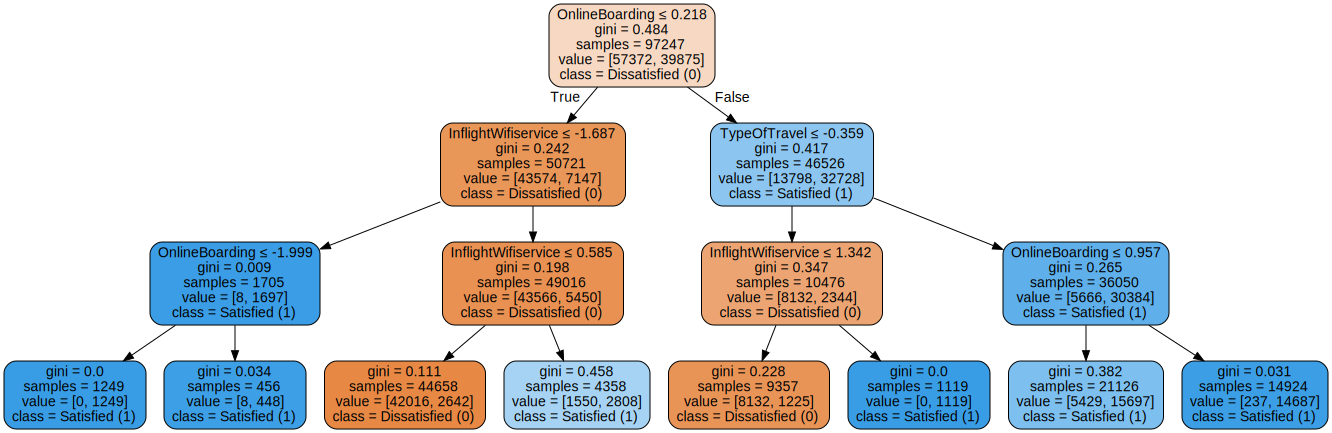

In [23]:
features = ['TypeOfTravel','InflightWifiservice','OnlineBoarding','SeatComfort','FlightDistance',
            'InflightEntertainment','OnBoardService','LegRoomService','Cleanliness','CheckinService', 
            'InflightService', 'BaggageHandling']
target = ['satisfaction']

# Split into test and train
X_train = df_train[features]
y_train = df_train[target].to_numpy()
X_test = df_test[features]
y_test = df_test[target].to_numpy()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

features_n = ['TypeOfTravel', 'InflightWifiservice', 'OnlineBoarding', 'SeatComfort']
X_train_n = scaler.fit_transform(df_train[features_n])
data = export_graphviz(DecisionTreeClassifier(max_depth=3).fit(X_train_n, y_train), out_file=None, 
                       feature_names = features_n,
                       class_names = ['Dissatisfied (0)', 'Satisfied (1)'], 
                       filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(data)
graph


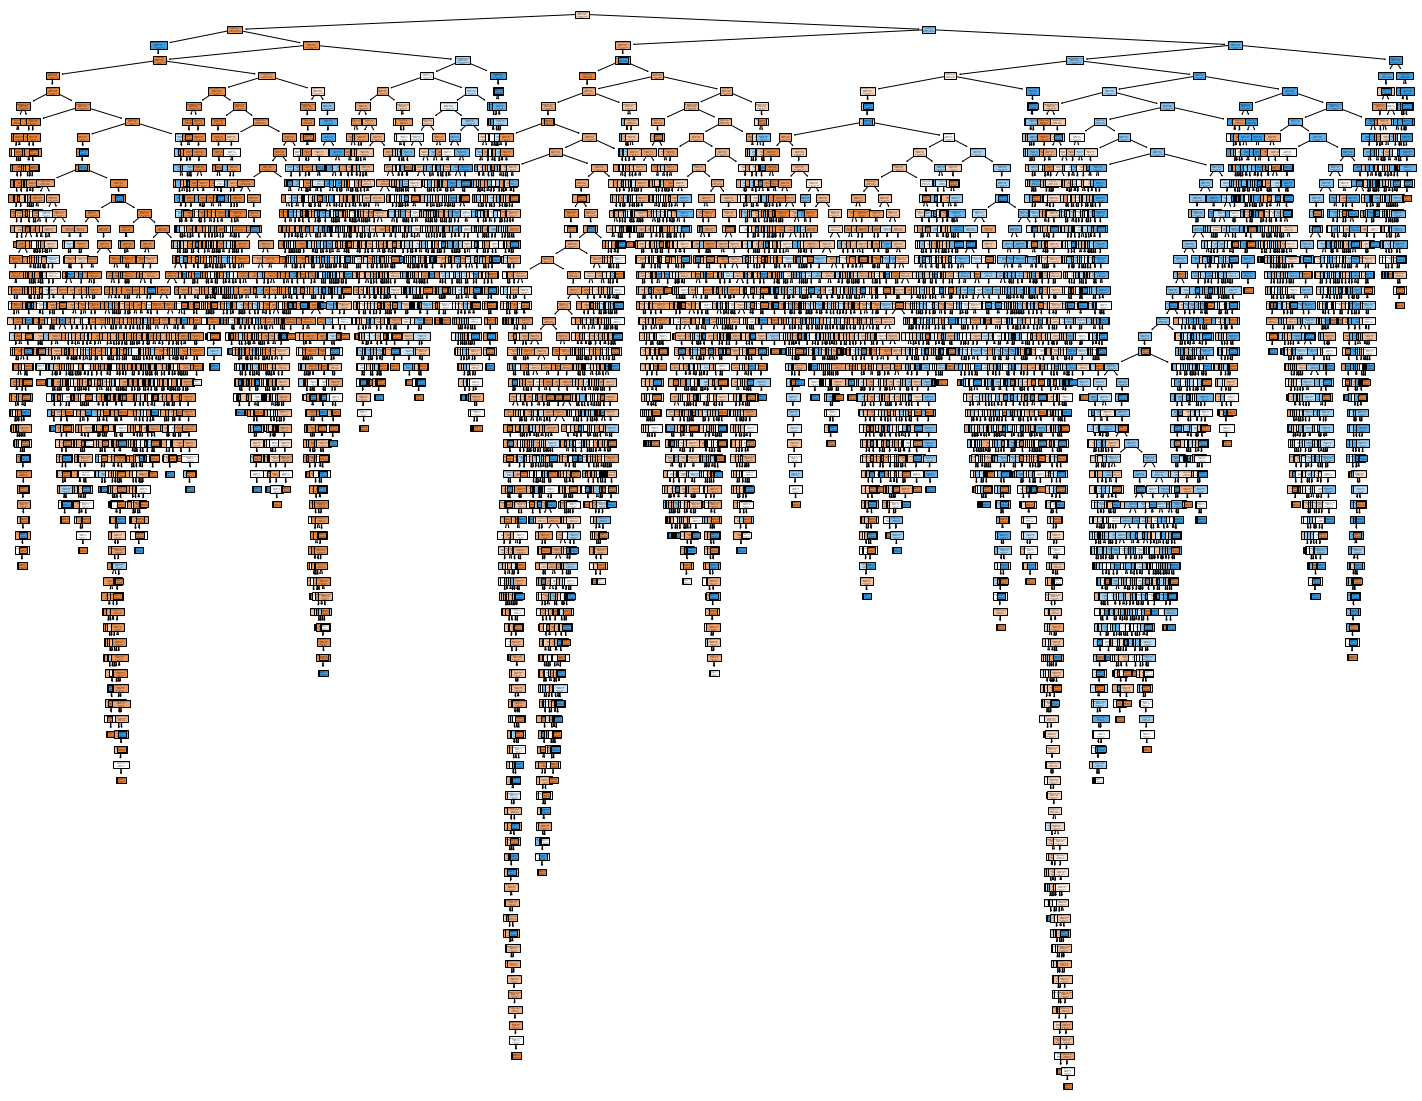

In [24]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree


fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names = ['CustomerType', 'TypeOfTravel', 'Class', 'FlightDistance', 
                                    'InflightWifiservice', 'EaseOfOnlineBooking', 
                                    'FoodAndDrink', 'OnlineBoarding', 'SeatComfort', 'InflightEntertainment', 
                                    'OnBoardService','Cleanliness'], 
                   class_names = ['1', '0'],
                   filled=True)